### Doğukan Güven
### Konu: Bir bankanın, müşterilerine kredi verme verilerinin; görselleştirimesi, ön işlemesi, veri analizinin yapılması ve müşteriye kredi verilip verilemeyeceği probleminin sınıflandırma modellerinin oluşturulması. 

In [1]:
import pandas as pd

# 1-Veri setinin ortama aktarılması

In [2]:
dataFrame = pd.read_csv("data.csv")
dataFrame

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


# 2-Tanımlayıcı Veri Analizi

## Veri setindeki kayıt sayısı

In [3]:
dataFrame.shape[0]

148670

## Veri setindeki nitelik sayısı

In [4]:
dataFrame.shape[1]

34

## Veri setindeki nitelikler

In [5]:
dataFrame.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

## Veri setindeki nitelik tipleri ve nitelik değeri null olmayan örnek sayıları 

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## Veri setindeki yas araliklari

In [7]:
ages = dataFrame['age'].unique()

In [8]:
ages

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

## Kredi için başvuran kişilerin yaş aralıkları ve dağılımları.

In [9]:
dataFrame['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

## Kredi için başvuran kişilerin cinsiyet bilgisine göre dağılımı.

In [10]:
dataFrame['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

## Kredi tipleri ve tercih sayıları.

In [11]:
dataFrame['credit_type'].value_counts()

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

## Bölgelere göre kredi başvuru sayısı.

In [12]:
dataFrame['Region'].value_counts()

North         74722
south         64016
central        8697
North-East     1235
Name: Region, dtype: int64

## Kredi başvurularından kabul edilen ve edilmeyenlerin sayısı.

In [13]:
dataFrame['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

## Kredinin geri ödeme süresi ve geri ödeme sürelerinin tercih edilme sayısı.

In [14]:
dataFrame['term'].value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64

## Sayısal niteliklerin Merkezi Eğilim ve Dağılım ölçüleri

In [15]:
des = dataFrame.describe().T
des

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


### Sayısal niteliklerin boş olmayan örnek sayısı

In [16]:
des['count']

ID                      148670.0
year                    148670.0
loan_amount             148670.0
rate_of_interest        112231.0
Interest_rate_spread    112031.0
Upfront_charges         109028.0
term                    148629.0
property_value          133572.0
income                  139520.0
Credit_Score            148670.0
LTV                     133572.0
Status                  148670.0
dtir1                   124549.0
Name: count, dtype: float64

### Sayısal niteliklerin ortalamaları

In [17]:
des['mean']

ID                       99224.500000
year                      2019.000000
loan_amount             331117.743997
rate_of_interest             4.045476
Interest_rate_spread         0.441656
Upfront_charges           3224.996127
term                       335.136582
property_value          497893.465696
income                    6957.338876
Credit_Score               699.789103
LTV                         72.746457
Status                       0.246445
dtir1                       37.732932
Name: mean, dtype: float64

### Sayısal verilerin standard sapmaları

In [18]:
des['std']

ID                       42917.476598
year                         0.000000
loan_amount             183909.310127
rate_of_interest             0.561391
Interest_rate_spread         0.513043
Upfront_charges           3251.121510
term                        58.409084
property_value          359935.315562
income                    6496.586382
Credit_Score               115.875857
LTV                         39.967603
Status                       0.430942
dtir1                       10.545435
Name: std, dtype: float64

### Sayısal verilerin tepe değerleri (Mod)

In [19]:
dataFrame.mode(numeric_only=True)

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019.0,206500.0,3.99,-0.028,0.0,360.0,308000.0,0.0,763.0,81.25,0.0,37.0
1,24891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148666,173556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148667,173557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148668,173558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sayısal verilerin 5 sayı özetleri

In [20]:
des['25%']

ID                       62057.25000
year                      2019.00000
loan_amount             196500.00000
rate_of_interest             3.62500
Interest_rate_spread         0.07600
Upfront_charges            581.49000
term                       360.00000
property_value          268000.00000
income                    3720.00000
Credit_Score               599.00000
LTV                         60.47486
Status                       0.00000
dtir1                       31.00000
Name: 25%, dtype: float64

#### Sayısal verilerin Medyanı (2. çeyrekliği)

In [21]:
des['50%']

ID                       99224.50000
year                      2019.00000
loan_amount             296500.00000
rate_of_interest             3.99000
Interest_rate_spread         0.39040
Upfront_charges           2596.45000
term                       360.00000
property_value          418000.00000
income                    5760.00000
Credit_Score               699.00000
LTV                         75.13587
Status                       0.00000
dtir1                       39.00000
Name: 50%, dtype: float64

#### Sayısal verilerin 3. çeyrekliği

In [22]:
des['75%']

ID                      136391.750000
year                      2019.000000
loan_amount             436500.000000
rate_of_interest             4.375000
Interest_rate_spread         0.775400
Upfront_charges           4812.500000
term                       360.000000
property_value          628000.000000
income                    8520.000000
Credit_Score               800.000000
LTV                         86.184211
Status                       0.000000
dtir1                       45.000000
Name: 75%, dtype: float64

#### Sayısal verilerin minimum değerleri

In [23]:
des['min']

ID                      24890.000000
year                     2019.000000
loan_amount             16500.000000
rate_of_interest            0.000000
Interest_rate_spread       -3.638000
Upfront_charges             0.000000
term                       96.000000
property_value           8000.000000
income                      0.000000
Credit_Score              500.000000
LTV                         0.967478
Status                      0.000000
dtir1                       5.000000
Name: min, dtype: float64

#### Sayısal verilerin maximum değerleri

In [24]:
des['max']

ID                      1.735590e+05
year                    2.019000e+03
loan_amount             3.576500e+06
rate_of_interest        8.000000e+00
Interest_rate_spread    3.357000e+00
Upfront_charges         6.000000e+04
term                    3.600000e+02
property_value          1.650800e+07
income                  5.785800e+05
Credit_Score            9.000000e+02
LTV                     7.831250e+03
Status                  1.000000e+00
dtir1                   6.100000e+01
Name: max, dtype: float64

### Sayısal verilerin alt ve üst sınır değerleri


In [25]:
for i in range(des.shape[0]):
    print(des.iloc[i].name)
    q1 = des['25%'][i]
    q2 = des['50%'][i]
    q3 = des['75%'][i]
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    print("Verilerinin alt sınır degeri: " + str(lower_bound))
    print("Verilerinin üst sınır değeri: " + str(upper_bound))
    print("\n")

ID
Verilerinin alt sınır degeri: -49444.5
Verilerinin üst sınır değeri: 247893.5


year
Verilerinin alt sınır degeri: 2019.0
Verilerinin üst sınır değeri: 2019.0


loan_amount
Verilerinin alt sınır degeri: -163500.0
Verilerinin üst sınır değeri: 796500.0


rate_of_interest
Verilerinin alt sınır degeri: 2.5
Verilerinin üst sınır değeri: 5.5


Interest_rate_spread
Verilerinin alt sınır degeri: -0.9731000000000002
Verilerinin üst sınır değeri: 1.8245


Upfront_charges
Verilerinin alt sınır degeri: -5765.025000000001
Verilerinin üst sınır değeri: 11159.015


term
Verilerinin alt sınır degeri: 360.0
Verilerinin üst sınır değeri: 360.0


property_value
Verilerinin alt sınır degeri: -272000.0
Verilerinin üst sınır değeri: 1168000.0


income
Verilerinin alt sınır degeri: -3480.0
Verilerinin üst sınır değeri: 15720.0


Credit_Score
Verilerinin alt sınır degeri: 297.5
Verilerinin üst sınır değeri: 1101.5


LTV
Verilerinin alt sınır degeri: 21.910835055
Verilerinin üst sınır değeri: 124.748235815

### Sayısal verilerin varyansları

In [26]:
dataFrame.var(numeric_only=True)

ID                      1.841910e+09
year                    0.000000e+00
loan_amount             3.382263e+10
rate_of_interest        3.151601e-01
Interest_rate_spread    2.632128e-01
Upfront_charges         1.056979e+07
term                    3.411621e+03
property_value          1.295534e+11
income                  4.220563e+07
Credit_Score            1.342721e+04
LTV                     1.597409e+03
Status                  1.857112e-01
dtir1                   1.112062e+02
dtype: float64

### Sayısal verilerin kovaryansları


In [27]:
dataFrame.cov()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.841910e+09,0.0,-4.467200e+06,10.647864,51.498548,-7.684807e+05,-1.016675e+04,1.528669e+07,7.069532e+05,-5150.755679,-1.003449e+04,31.499159,-3679.292209
year,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
loan_amount,-4.467200e+06,0.0,3.382263e+10,-14815.072847,-33856.310916,3.728627e+07,1.874201e+06,4.803339e+10,5.466875e+08,94582.762683,2.823512e+05,-2918.560845,28889.508579
rate_of_interest,1.064786e+01,0.0,-1.481507e+04,0.315160,0.177093,-1.367750e+02,6.909817e+00,-2.359139e+04,-1.412224e+02,-0.086448,-5.162464e-03,0.000544,0.301104
Interest_rate_spread,5.149855e+01,0.0,-3.385631e+04,0.177093,0.263213,5.494766e+01,-4.742448e+00,-5.883913e+04,-4.557840e+02,-0.103157,8.626728e-01,0.000000,0.380813
Upfront_charges,-7.684807e+05,0.0,3.728627e+07,-136.774986,54.947657,1.056979e+07,-1.047911e+04,5.783234e+07,3.366673e+05,-558.160455,-4.290477e+03,-2.329175,3.769798
term,-1.016675e+04,0.0,1.874201e+06,6.909817,-4.742448,-1.047911e+04,3.411621e+03,9.485102e+05,-2.088813e+04,-21.315231,2.494097e+02,-0.006036,69.891260
property_value,1.528669e+07,0.0,4.803339e+10,-23591.391862,-58839.130680,5.783234e+07,9.485102e+05,1.295534e+11,9.927116e+08,101349.802475,-3.094400e+06,-6468.731472,-218164.207683
income,7.069532e+05,0.0,5.466875e+08,-141.222401,-455.784010,3.366673e+05,-2.088813e+04,9.927116e+08,4.220563e+07,603.551733,-8.155364e+03,-184.088448,-18379.435813
Credit_Score,-5.150756e+03,0.0,9.458276e+04,-0.086448,-0.103157,-5.581605e+02,-2.131523e+01,1.013498e+05,6.035517e+02,13427.214144,-2.562461e+01,0.199928,-0.382383


#### Kovaryans Matrisi; 
#### 1-propert_value ile credit_score arasında pozitif bir ilişki olduğunu göstermektedir.
#### 2-propert_value ile dtir1 arasında negatif bir ilişki olduğunu göstermektedir.
#### 3-rate_of_interest ile term arasında pozitif bir ilişki olduğunu göstermektedir.
#### 4-LTV ile income arasında negatif bir ilişki olduğunu gösterir.

 ### Sayısal verilerin korelasyonları

In [28]:
dataFrame.corr()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000566,0.000442,0.002338,-0.005507,-0.004056,0.000990,0.002535,-0.001036,-0.005853,0.001703,-0.008132
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,0.000442,NaN,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
Interest_rate_spread,0.002338,NaN,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
Upfront_charges,-0.005507,NaN,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,-0.004056,NaN,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.000990,NaN,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.002535,NaN,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,-0.001036,NaN,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313


#### Korelasyon Matrisi; 
#### 1-propert_value ile loan_amount arasında güçlü pozitif bir ilişki olduğunu göstermektedir.
#### 2-loan_amount ile Interest_rate_spread arasında zayıf negatif bir ilişki olduğunu göstermektedir.
#### 3-rate_of_interest ile term arasında zayıf pozitif bir ilişki olduğunu göstermektedir.
#### 4-LTV ile property_value arasında zayif negatif bir ilişki olduğunu gösterir.

# 3-Verinin Görselleştirilerek Ayrıntılı Analizinin Yapılması

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Ürünlerin Wordcloud ile görselleştirilmesi

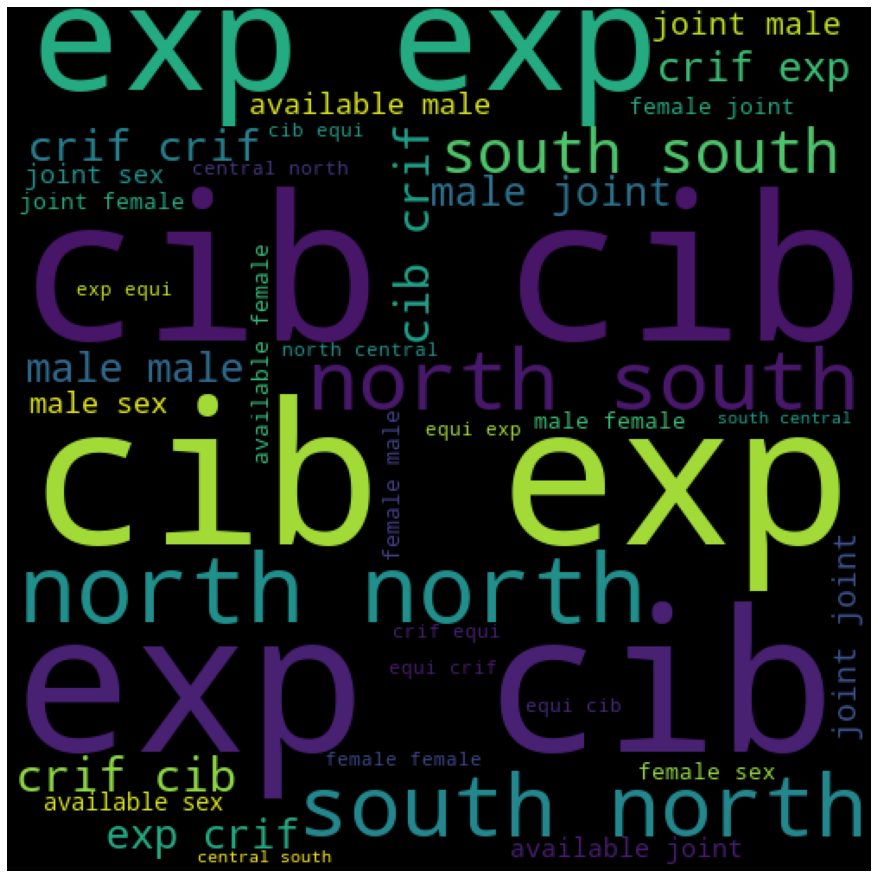

In [30]:
Metin = '' 
for i in dataFrame.columns:                         # Verisetinin niteliklerini gezinen döngü.
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

for i in dataFrame['co-applicant_credit_type']:
    if type(i) != str:
        continue
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

for i in dataFrame['Region']:
    if type(i) != str:
        continue
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

for i in dataFrame['Gender']:
    if type(i) != str:
        continue
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

for i in dataFrame['credit_type']:
    if type(i) != str:
        continue
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

wordcloud = WordCloud(width = 500, height = 500,  # Wordcloud u oluşturan komut
                background_color ='black',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(Metin)
                        
plt.figure(figsize = (12, 12))                      # Wordcloud u ekrana yazdırmak için grafik çizimi yapan komutlar.
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Cinsiyet dağılımının pasta grafiği ile gösterilmesi

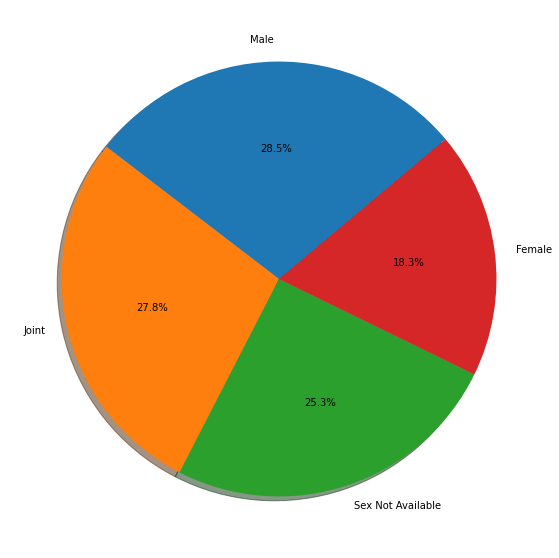

In [31]:
plt.figure(figsize=(10, 10))
plt.pie(dataFrame['Gender'].value_counts(), startangle=40, autopct='%1.1f%%', shadow=True, labels=dataFrame['Gender'].value_counts().index)
plt.show()

## Bölgelere göre kredi talep miktarlarının barplot ile gösterimi.


<AxesSubplot:xlabel='Region', ylabel='count'>

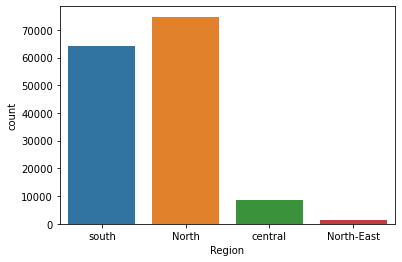

In [32]:
# sns.barplot(x=dataFrame['Region'].value_counts().index, y=dataFrame['Region'].value_counts(), data=dataFrame['Region'].value_counts())
sns.countplot(data=dataFrame , x='Region')

## Kredi tiplerinin tercih sayılarının coutplot ile gösterimi

<AxesSubplot:xlabel='loan_type', ylabel='count'>

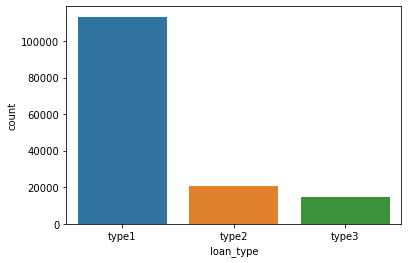

In [33]:
sns.countplot(data=dataFrame , x='loan_type')

## Yaş dağılımının coutplot ile gösterimi

<AxesSubplot:xlabel='age', ylabel='count'>

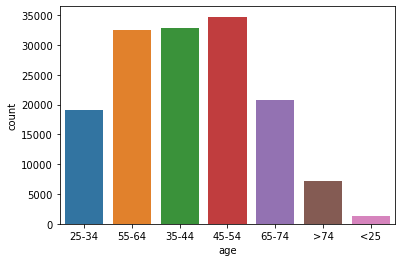

In [34]:
sns.countplot(data=dataFrame , x='age')

## Kredi miktarı ile gelir değerleri arasındaki ilişkinin relplot ile gösterilmesi

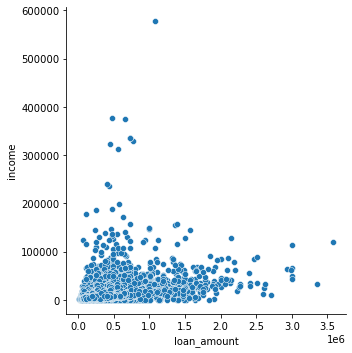

In [35]:
sns.relplot(x ="loan_amount", y ="income",data = dataFrame)

## Kredi skoru ile kredi miktarı arasındaki ilişkinin yaş dağılımlarına göre relplot ile gösterimi

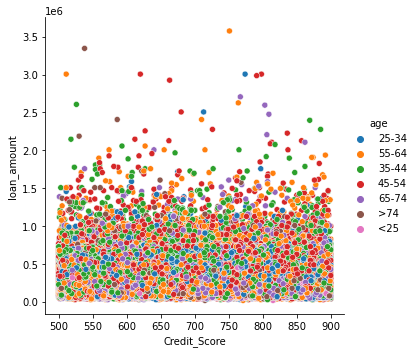

In [36]:
sns.relplot(x ="Credit_Score", y ="loan_amount", hue='age' ,data = dataFrame)

## Kredi skoru ile kredi miktarı arasındaki ilişkinin ödenme durumuna göre relplot ile gösterimi

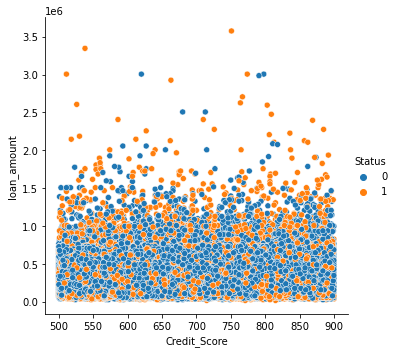

In [37]:
sns.relplot(x ="Credit_Score", y ="loan_amount", hue='Status' ,data = dataFrame)

## Kredi miktarları sayılarının histplot ile gösterimi

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

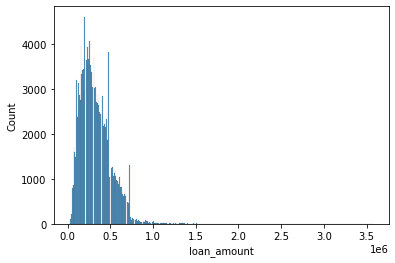

In [38]:
sns.histplot(dataFrame['loan_amount'])

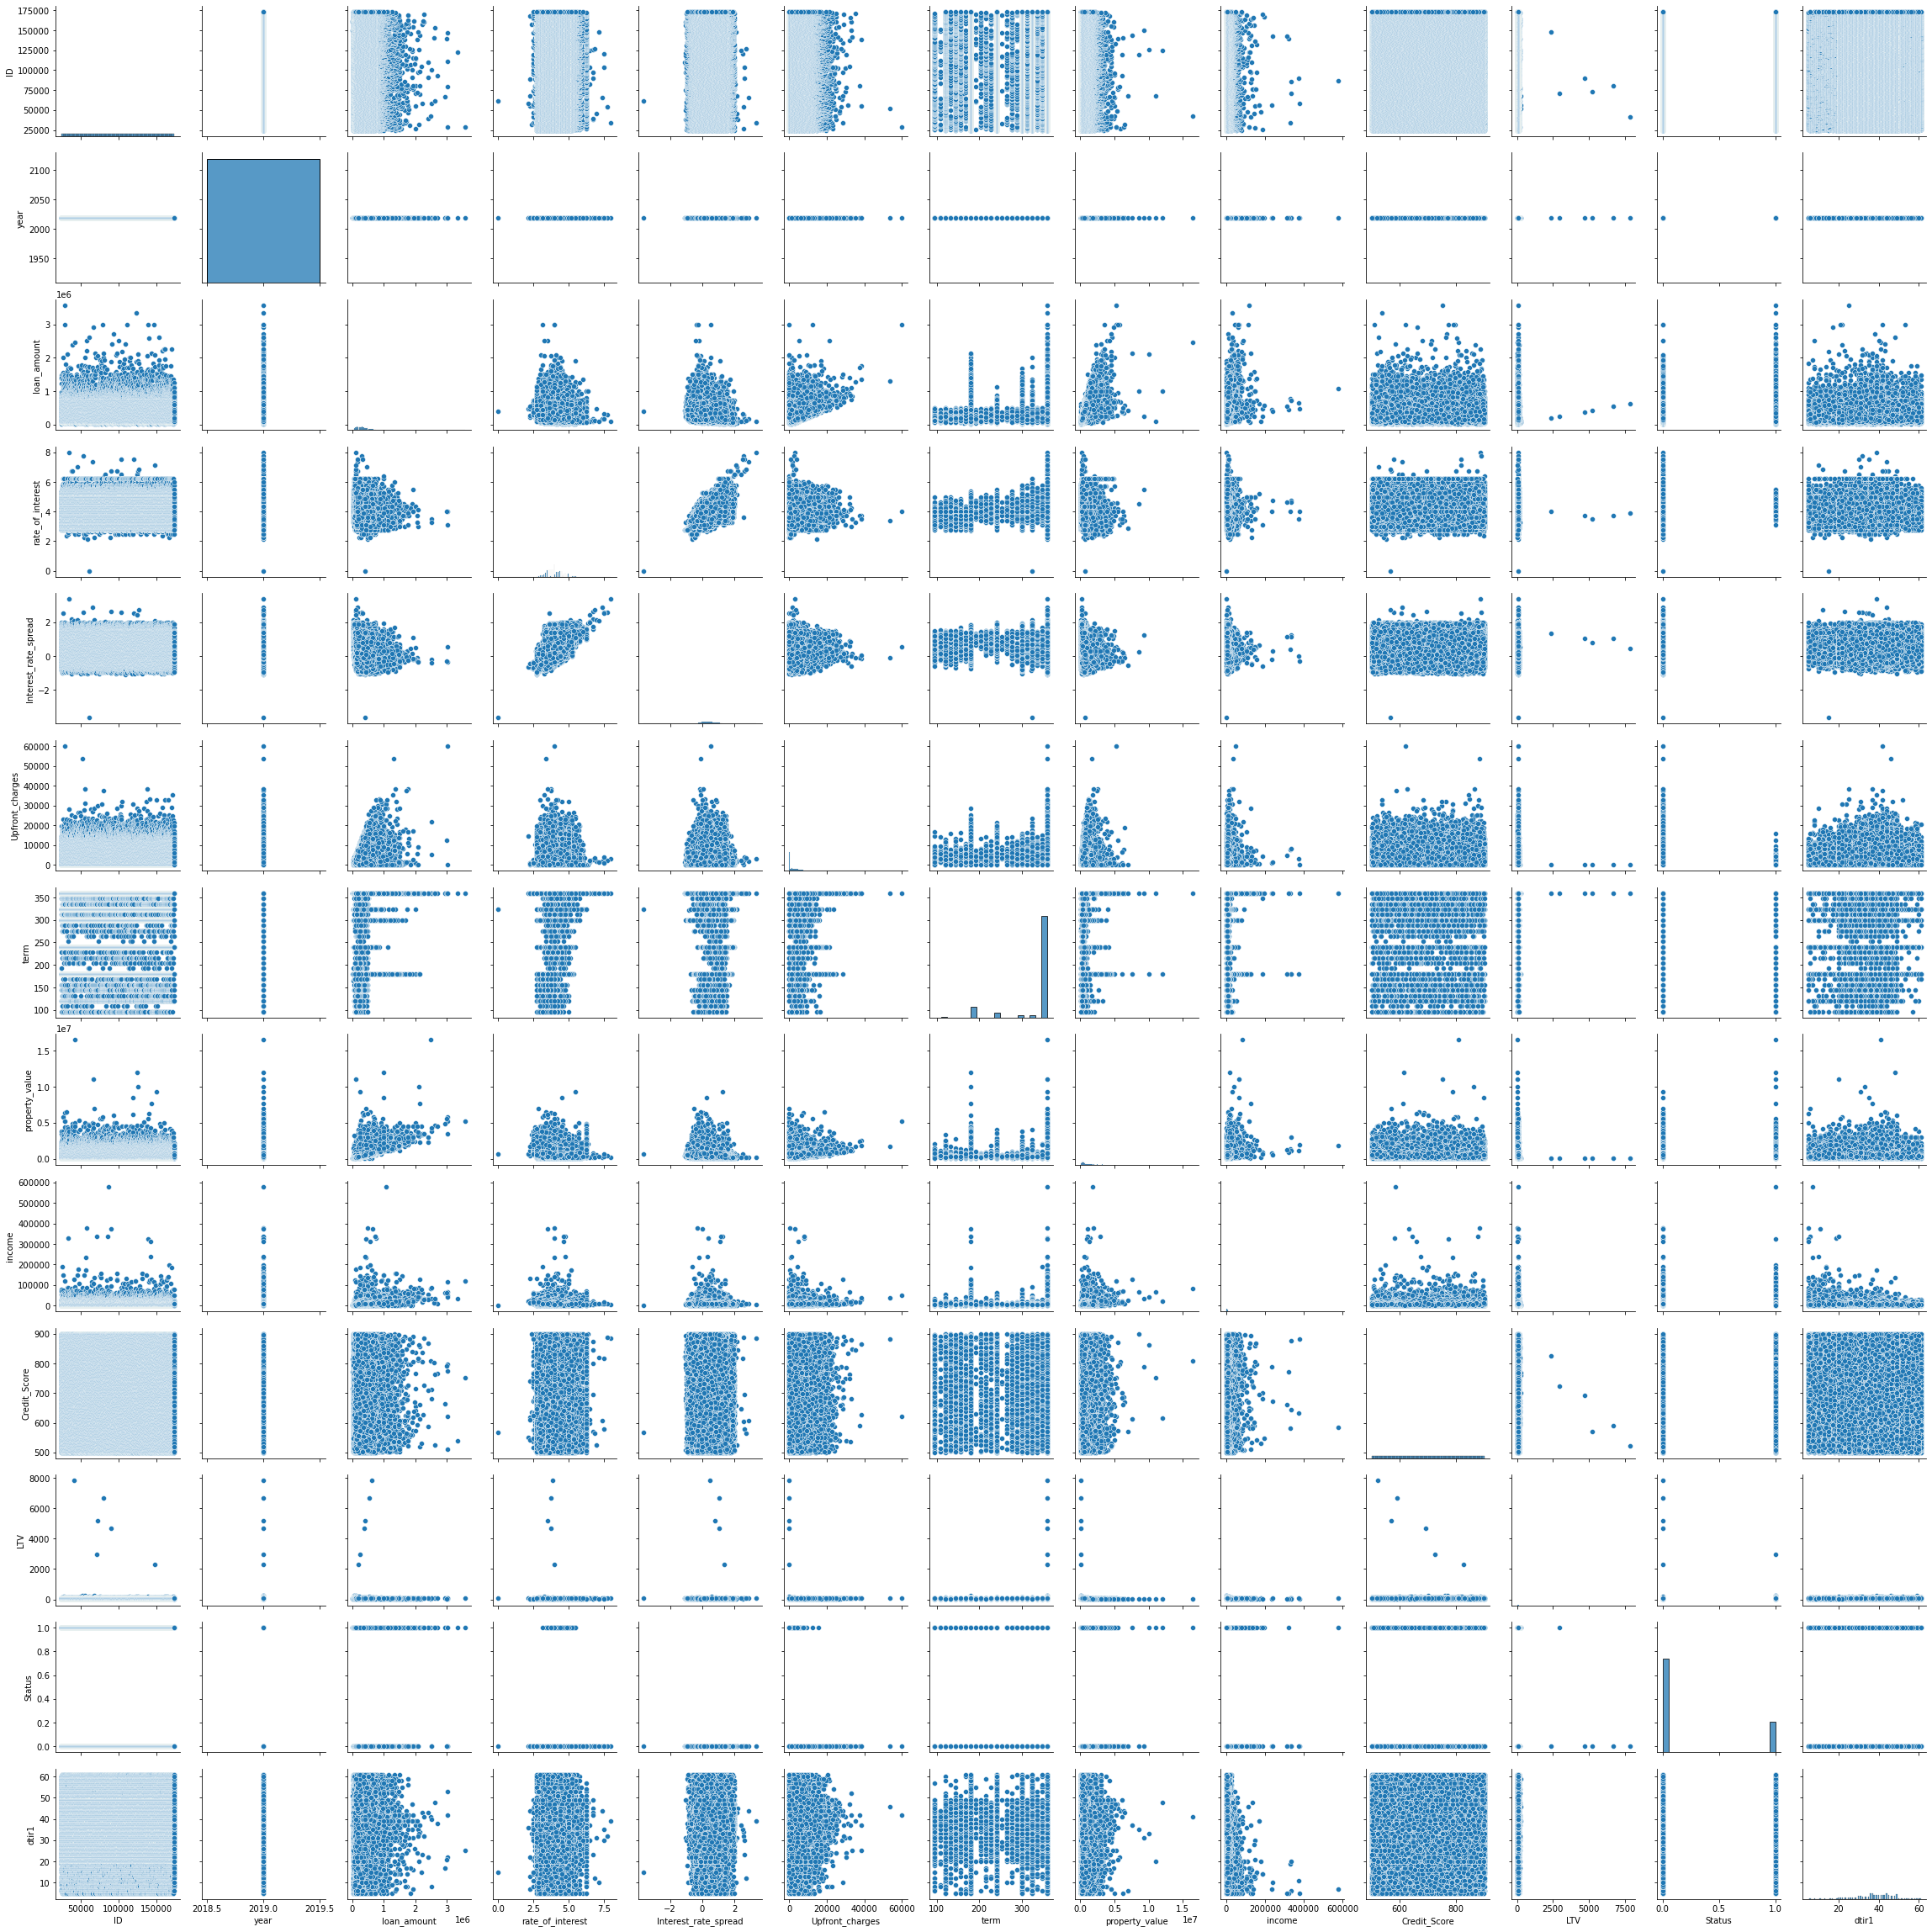

In [39]:
sns.pairplot(dataFrame)

## Property Value niteliğinin box plotta gösterimi.

<AxesSubplot:xlabel='property_value'>

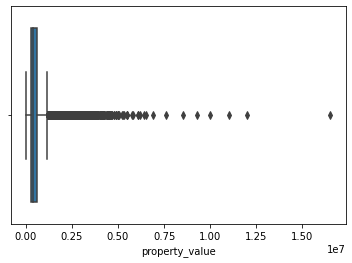

In [40]:
sns.boxplot(x=dataFrame['property_value'])

## Credit Score niteliğinin box plotta gösterimi.

<AxesSubplot:xlabel='Credit_Score'>

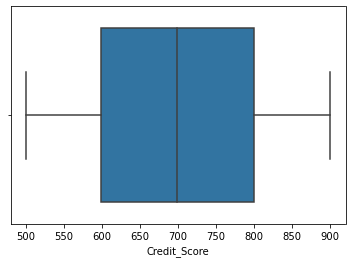

In [41]:
sns.boxplot(x=dataFrame['Credit_Score'])

# 4-Veri seti üzerinde veri ön-işleme çalışması yapılması

In [42]:
dataFrame

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


## Sınıflandırmada işe yaramayacak verilerin silinmesi

In [43]:
columns= ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 
'Credit_Worthiness', 'open_credit','business_or_commercial','Interest_rate_spread', 
'Upfront_charges', 'Neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 
'occupancy_type', 'Secured_by', 'total_units','credit_type', 'co-applicant_credit_type',
'submission_of_application', 'LTV', 'Region', 'Security_Type']
dataFrame.drop(columns,axis=1, inplace =True)


In [44]:
dataFrame.columns

Index(['loan_type', 'loan_purpose', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'Credit_Score', 'age', 'Status', 'dtir1'],
      dtype='object')

## Null verilerin kontrolü.

In [45]:
dataFrame.isnull().sum()

loan_type               0
loan_purpose          134
loan_amount             0
rate_of_interest    36439
term                   41
property_value      15098
income               9150
Credit_Score            0
age                   200
Status                  0
dtir1               24121
dtype: int64

## Null olmayan verilerin kontrolü.

In [46]:
dataFrame.notnull().sum()

loan_type           148670
loan_purpose        148536
loan_amount         148670
rate_of_interest    112231
term                148629
property_value      133572
income              139520
Credit_Score        148670
age                 148470
Status              148670
dtir1               124549
dtype: int64

## Null verilerin yüzdelik değerleri.

In [47]:
dataFrame.isnull().sum() / dataFrame.shape[0] * 100

loan_type            0.000000
loan_purpose         0.090133
loan_amount          0.000000
rate_of_interest    24.509989
term                 0.027578
property_value      10.155378
income               6.154571
Credit_Score         0.000000
age                  0.134526
Status               0.000000
dtir1               16.224524
dtype: float64

In [48]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148670 non-null  object 
 1   loan_purpose      148536 non-null  object 
 2   loan_amount       148670 non-null  int64  
 3   rate_of_interest  112231 non-null  float64
 4   term              148629 non-null  float64
 5   property_value    133572 non-null  float64
 6   income            139520 non-null  float64
 7   Credit_Score      148670 non-null  int64  
 8   age               148470 non-null  object 
 9   Status            148670 non-null  int64  
 10  dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 12.5+ MB


## Loan Purpose  niteliğindeki null alanların doldurulması.


In [49]:
dataFrame['loan_purpose'].fillna(dataFrame['loan_purpose'].mode()[0], inplace=True)

#### Loan Purpose kategorik bir değişken olduğu için kategorik veriler için boş alan doldurma yöntemi kullanılmıştır.

## Age niteliğindeki null alanların doldurulması.


In [50]:
dataFrame['age'].fillna(dataFrame['age'].mode()[0], inplace=True)

#### Age kategorik bir değişken olduğu için kategorik veriler için boş alan doldurma yöntemi kullanılmıştır.

## Aykırı Veri Tespiti

### Property Value niteliği için aykırı veri tespiti.

0         118000.0
1              NaN
2         508000.0
3         658000.0
4         758000.0
            ...   
148665    608000.0
148666    788000.0
148667    728000.0
148668    278000.0
148669    558000.0
Name: property_value, Length: 148670, dtype: float64


<AxesSubplot:xlabel='property_value'>

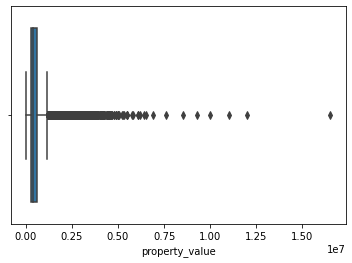

In [51]:
tmp_df = dataFrame['property_value'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [52]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : -272000.0
Üst Sınır Değeri : 1168000.0
1. Çeyrek : 268000.0
2. Çeyrek : 418000.0
3. Çeyrek : 628000.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0         118000.0
1              NaN
2         508000.0
3         658000.0
4         758000.0
            ...   
148665    608000.0
148666    788000.0
148667    728000.0
148668    278000.0
148669    558000.0
Name: property_value, Length: 143404, dtype: float64


<AxesSubplot:xlabel='property_value'>

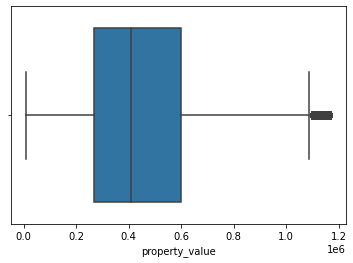

In [53]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### Property Value niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [54]:
dataFrame['property_value'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount             0
rate_of_interest    36439
term                   41
property_value      20364
income               9150
Credit_Score            0
age                     0
Status                  0
dtir1               24121
dtype: int64

### Loan Amount niteliği için aykırı veri tespiti.

0         116500
1         206500
2         406500
3         456500
4         696500
           ...  
148665    436500
148666    586500
148667    446500
148668    196500
148669    406500
Name: loan_amount, Length: 148670, dtype: int64


<AxesSubplot:xlabel='loan_amount'>

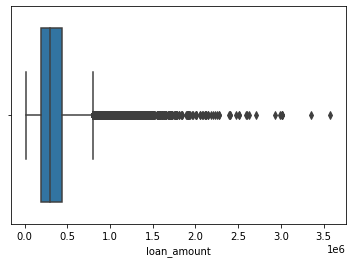

In [55]:
tmp_df = dataFrame['loan_amount'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

In [56]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : -163500.0
Üst Sınır Değeri : 796500.0
1. Çeyrek : 196500.0
2. Çeyrek : 296500.0
3. Çeyrek : 436500.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0         116500
1         206500
2         406500
3         456500
4         696500
           ...  
148665    436500
148666    586500
148667    446500
148668    196500
148669    406500
Name: loan_amount, Length: 146775, dtype: int64


<AxesSubplot:xlabel='loan_amount'>

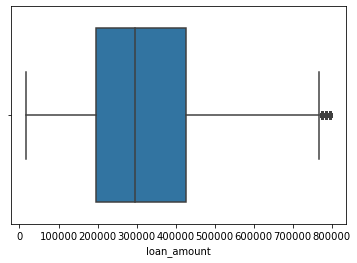

In [57]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### Loan Amount niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [58]:
dataFrame['loan_amount'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount          1895
rate_of_interest    36439
term                   41
property_value      20364
income               9150
Credit_Score            0
age                     0
Status                  0
dtir1               24121
dtype: int64

### Rate of İnterest niteliği için aykırı veri tespiti.

0           NaN
1           NaN
2         4.560
3         4.250
4         4.000
          ...  
148665    3.125
148666    5.190
148667    3.125
148668    3.500
148669    4.375
Name: rate_of_interest, Length: 148670, dtype: float64


<AxesSubplot:xlabel='rate_of_interest'>

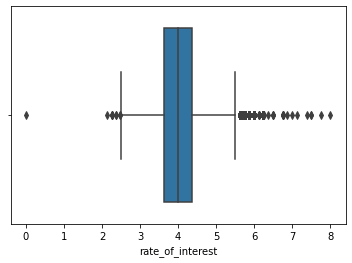

In [59]:
tmp_df = dataFrame['rate_of_interest'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [60]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : 2.5
Üst Sınır Değeri : 5.5
1. Çeyrek : 3.625
2. Çeyrek : 3.99
3. Çeyrek : 4.375


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0           NaN
1           NaN
2         4.560
3         4.250
4         4.000
          ...  
148665    3.125
148666    5.190
148667    3.125
148668    3.500
148669    4.375
Name: rate_of_interest, Length: 147814, dtype: float64


<AxesSubplot:xlabel='rate_of_interest'>

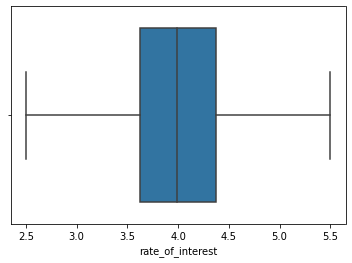

In [61]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### Rate of Interest niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [62]:
dataFrame['rate_of_interest'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount          1895
rate_of_interest    37295
term                   41
property_value      20364
income               9150
Credit_Score            0
age                     0
Status                  0
dtir1               24121
dtype: int64

### term niteliği için aykırı veri tespiti.

0         360.0
1         360.0
2         360.0
3         360.0
4         360.0
          ...  
148665    180.0
148666    360.0
148667    180.0
148668    180.0
148669    240.0
Name: term, Length: 148670, dtype: float64


<AxesSubplot:xlabel='term'>

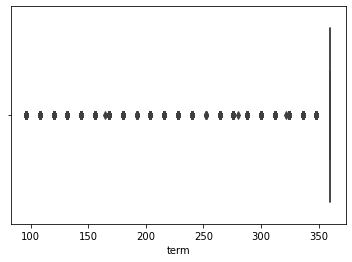

In [63]:
tmp_df = dataFrame['term'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [64]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : 360.0
Üst Sınır Değeri : 360.0
1. Çeyrek : 360.0
2. Çeyrek : 360.0
3. Çeyrek : 360.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0         360.0
1         360.0
2         360.0
3         360.0
4         360.0
          ...  
148661    360.0
148662    360.0
148663    360.0
148664    360.0
148666    360.0
Name: term, Length: 121726, dtype: float64


<AxesSubplot:xlabel='term'>

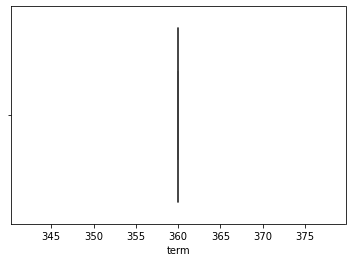

In [65]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### term niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [66]:
dataFrame['term'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount          1895
rate_of_interest    37295
term                26985
property_value      20364
income               9150
Credit_Score            0
age                     0
Status                  0
dtir1               24121
dtype: int64

### income niteliği için aykırı veri tespiti.

0          1740.0
1          4980.0
2          9480.0
3         11880.0
4         10440.0
           ...   
148665     7860.0
148666     7140.0
148667     6900.0
148668     7140.0
148669     7260.0
Name: income, Length: 148670, dtype: float64


<AxesSubplot:xlabel='income'>

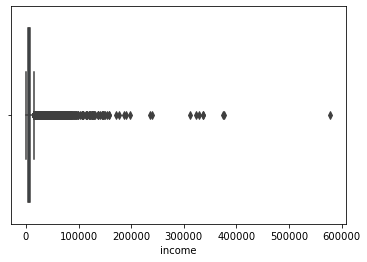

In [67]:
tmp_df = dataFrame['income'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [68]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : -3480.0
Üst Sınır Değeri : 15720.0
1. Çeyrek : 3720.0
2. Çeyrek : 5760.0
3. Çeyrek : 8520.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0          1740.0
1          4980.0
2          9480.0
3         11880.0
4         10440.0
           ...   
148665     7860.0
148666     7140.0
148667     6900.0
148668     7140.0
148669     7260.0
Name: income, Length: 142124, dtype: float64


<AxesSubplot:xlabel='income'>

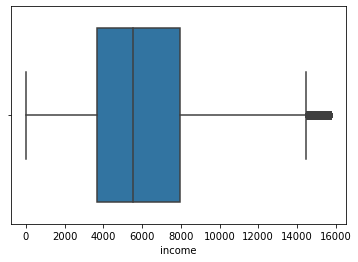

In [69]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### income niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [70]:
dataFrame['income'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount          1895
rate_of_interest    37295
term                26985
property_value      20364
income              15696
Credit_Score            0
age                     0
Status                  0
dtir1               24121
dtype: int64

### Credit_Score niteliği için aykırı veri tespiti.

0         758
1         552
2         834
3         587
4         602
         ... 
148665    659
148666    569
148667    702
148668    737
148669    830
Name: Credit_Score, Length: 148670, dtype: int64


<AxesSubplot:xlabel='Credit_Score'>

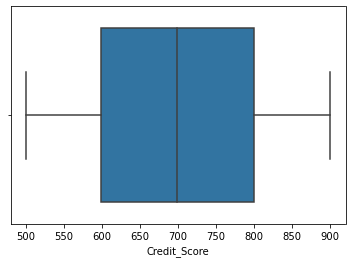

In [71]:
tmp_df = dataFrame['Credit_Score'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [72]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : 297.5
Üst Sınır Değeri : 1101.5
1. Çeyrek : 599.0
2. Çeyrek : 699.0
3. Çeyrek : 800.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0         758
1         552
2         834
3         587
4         602
         ... 
148665    659
148666    569
148667    702
148668    737
148669    830
Name: Credit_Score, Length: 148670, dtype: int64


<AxesSubplot:xlabel='Credit_Score'>

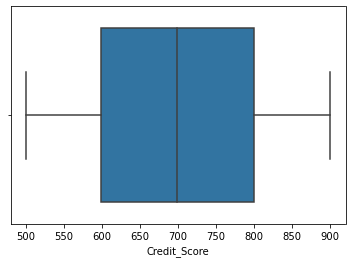

In [73]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### Credit_Score niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [74]:
dataFrame['Credit_Score'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount          1895
rate_of_interest    37295
term                26985
property_value      20364
income              15696
Credit_Score            0
age                     0
Status                  0
dtir1               24121
dtype: int64

### dtir1 niteliği için aykırı veri tespiti.

0         45.0
1          NaN
2         46.0
3         42.0
4         39.0
          ... 
148665    48.0
148666    15.0
148667    49.0
148668    29.0
148669    44.0
Name: dtir1, Length: 148670, dtype: float64


<AxesSubplot:xlabel='dtir1'>

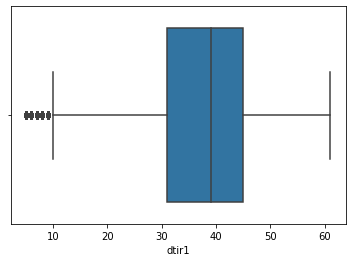

In [75]:
tmp_df = dataFrame['dtir1'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [76]:
#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : 10.0
Üst Sınır Değeri : 66.0
1. Çeyrek : 31.0
2. Çeyrek : 39.0
3. Çeyrek : 45.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0         45.0
1          NaN
2         46.0
3         42.0
4         39.0
          ... 
148665    48.0
148666    15.0
148667    49.0
148668    29.0
148669    44.0
Name: dtir1, Length: 146657, dtype: float64


<AxesSubplot:xlabel='dtir1'>

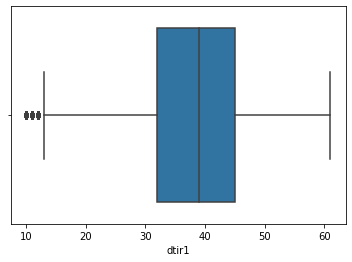

In [77]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### dtir1 niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [78]:
dataFrame['dtir1'] = clean
dataFrame.isnull().sum()

loan_type               0
loan_purpose            0
loan_amount          1895
rate_of_interest    37295
term                26985
property_value      20364
income              15696
Credit_Score            0
age                     0
Status                  0
dtir1               26134
dtype: int64

## KNN Algoritması ile Imputation

In [79]:
import numpy as np
from sklearn.impute import KNNImputer

### KNN algoritmasının hesap yapabilmesi için veri setimizdeki örnekleri içerisine yükledik.

In [80]:
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5,  weights='uniform')
for_knn_table = dataFrame.loc[:, ['loan_amount', 'rate_of_interest', 
'term', 'property_value', 'income', 'dtir1']]
imputer.fit(for_knn_table)

KNNImputer()

### KNN algoritması ile transform işlemi başlattık. Bu sayede boşluklar dolduruldu.

In [81]:
tmp = imputer.transform(for_knn_table)
tmp

array([[1.165e+05, 3.450e+00, 3.600e+02, 1.180e+05, 1.740e+03, 4.500e+01],
       [2.065e+05, 4.000e+00, 3.600e+02, 4.160e+05, 4.980e+03, 2.840e+01],
       [4.065e+05, 4.560e+00, 3.600e+02, 5.080e+05, 9.480e+03, 4.600e+01],
       ...,
       [4.465e+05, 3.125e+00, 3.600e+02, 7.280e+05, 6.900e+03, 4.900e+01],
       [1.965e+05, 3.500e+00, 3.600e+02, 2.780e+05, 7.140e+03, 2.900e+01],
       [4.065e+05, 4.375e+00, 3.600e+02, 5.580e+05, 7.260e+03, 4.400e+01]])

### Yeniden doldurulan nitelikler yenilenmiş bir indexe sahip olduğu için verimizinde indexlerini yenileyelim. Aksi durumda eşleşmeyen indexler için null değerler oluşacak.

In [82]:
dataFrame = dataFrame.reset_index()

### KNN transformdan çıkan sonuçları bir dataframe e çevirdik.

In [83]:
tmp_new = pd.DataFrame(tmp, columns= ['loan_amount', 'rate_of_interest', 
'term', 'property_value', 'income', 'dtir1'])
tmp_new

,loan_amount,rate_of_interest,term,property_value,income,dtir1
0,116500.0,3.450,360.0,118000.0,1740.0,45.0
1,206500.0,4.000,360.0,416000.0,4980.0,28.4
2,406500.0,4.560,360.0,508000.0,9480.0,46.0
3,456500.0,4.250,360.0,658000.0,11880.0,42.0
4,696500.0,4.000,360.0,758000.0,10440.0,39.0
...,...,...,...,...,...,...
148665,436500.0,3.125,360.0,608000.0,7860.0,48.0
148666,586500.0,5.190,360.0,788000.0,7140.0,15.0
148667,446500.0,3.125,360.0,728000.0,6900.0,49.0
148668,196500.0,3.500,360.0,278000.0,7140.0,29.0


### Sonuçları içeren dataframe'i, ana dataframe e ekleyelim.

In [84]:
dataFrame['loan_amount'] = tmp_new['loan_amount'].copy()
dataFrame['rate_of_interest'] = tmp_new['rate_of_interest'].copy()
dataFrame['term'] = tmp_new['term'].copy()
dataFrame['property_value'] = tmp_new['property_value'].copy()
dataFrame['income'] = tmp_new['income'].copy()
dataFrame['dtir1'] = tmp_new['dtir1'].copy()
dataFrame

,index,loan_type,loan_purpose,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,age,Status,dtir1
0,0,type1,p1,116500.0,3.450,360.0,118000.0,1740.0,758,25-34,1,45.0
1,1,type2,p1,206500.0,4.000,360.0,416000.0,4980.0,552,55-64,1,28.4
2,2,type1,p1,406500.0,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,3,type1,p4,456500.0,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,4,type1,p1,696500.0,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148665,148665,type1,p3,436500.0,3.125,360.0,608000.0,7860.0,659,55-64,0,48.0
148666,148666,type1,p1,586500.0,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,148667,type1,p4,446500.0,3.125,360.0,728000.0,6900.0,702,45-54,0,49.0
148668,148668,type1,p4,196500.0,3.500,360.0,278000.0,7140.0,737,55-64,0,29.0


In [85]:
dataFrame.drop('index',axis=1, inplace =True)
dataFrame

,loan_type,loan_purpose,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,age,Status,dtir1
0,type1,p1,116500.0,3.450,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,p1,206500.0,4.000,360.0,416000.0,4980.0,552,55-64,1,28.4
2,type1,p1,406500.0,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,p4,456500.0,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,p1,696500.0,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,p3,436500.0,3.125,360.0,608000.0,7860.0,659,55-64,0,48.0
148666,type1,p1,586500.0,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,type1,p4,446500.0,3.125,360.0,728000.0,6900.0,702,45-54,0,49.0
148668,type1,p4,196500.0,3.500,360.0,278000.0,7140.0,737,55-64,0,29.0


### Null değer kontrolü yapalım.

In [86]:
dataFrame.isnull().sum()

loan_type           0
loan_purpose        0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
Credit_Score        0
age                 0
Status              0
dtir1               0
dtype: int64

## Veri Dönüşümü

In [87]:
from sklearn import preprocessing

### Normalizasyon

In [88]:
x = dataFrame['loan_amount'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['loan_amount'] = minmax.fit_transform(x).T[0]

x = dataFrame['rate_of_interest'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['rate_of_interest'] = minmax.fit_transform(x).T[0]

x = dataFrame['term'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['term'] = minmax.fit_transform(x).T[0]

x = dataFrame['property_value'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['property_value'] = minmax.fit_transform(x).T[0]

x = dataFrame['income'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['income'] = minmax.fit_transform(x).T[0]

x = dataFrame['Credit_Score'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['Credit_Score'] = minmax.fit_transform(x).T[0]

x = dataFrame['dtir1'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
dataFrame['dtir1'] = minmax.fit_transform(x).T[0]

## Label Encoder - One Hot Encoder

### Label encoder ve One hot encoder ile kategorik veri olan loan type niteliğini boolean türünde ayrı niteliklere ayıralım.

In [89]:
targets = dataFrame.loan_type.values
OHE = preprocessing.OneHotEncoder()
OHE.fit(targets.reshape(-1, 1))
targets_trans = OHE.transform(targets.reshape(-1, 1))
print("Orijinal data: \n")
print(targets)
print("\nTransform data: \n")
print(targets_trans.toarray())

Orijinal data: 

['type1' 'type2' 'type1' ... 'type1' 'type1' 'type1']

Transform data: 

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [90]:
column = dataFrame['loan_type'].unique()
column

array(['type1', 'type2', 'type3'], dtype=object)

In [91]:
target_trans_dataframe = pd.DataFrame(targets_trans.toarray(), columns=column)
target_trans_dataframe

,type1,type2,type3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
148665,1.0,0.0,0.0
148666,1.0,0.0,0.0
148667,1.0,0.0,0.0
148668,1.0,0.0,0.0


In [92]:
#dataFrame.drop('loan_type',axis=1, inplace =True)
dataFrame = pd.concat([dataFrame, target_trans_dataframe],axis=1)
dataFrame.drop('loan_type', axis=1, inplace =True)
dataFrame

,loan_purpose,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,age,Status,dtir1,type1,type2,type3
0,p1,1.282051,3.166667,0.0,0.948276,1.106870,6.450,25-34,1,6.862745,1.0,0.0,0.0
1,p1,2.435897,5.000000,0.0,3.517241,3.167939,1.300,55-64,1,3.607843,0.0,1.0,0.0
2,p1,5.000000,6.866667,0.0,4.310345,6.030534,8.350,35-44,0,7.058824,1.0,0.0,0.0
3,p4,5.641026,5.833333,0.0,5.603448,7.557252,2.175,45-54,0,6.274510,1.0,0.0,0.0
4,p1,8.717949,5.000000,0.0,6.465517,6.641221,2.550,25-34,0,5.686275,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,p3,5.384615,2.083333,0.0,5.172414,5.000000,3.975,55-64,0,7.450980,1.0,0.0,0.0
148666,p1,7.307692,8.966667,0.0,6.724138,4.541985,1.725,25-34,0,0.980392,1.0,0.0,0.0
148667,p4,5.512821,2.083333,0.0,6.206897,4.389313,5.050,45-54,0,7.647059,1.0,0.0,0.0
148668,p4,2.307692,3.333333,0.0,2.327586,4.541985,5.925,55-64,0,3.725490,1.0,0.0,0.0


### Label encoder ve One hot encoder ile kategorik veri olan loan purpose niteliğini boolean türünde ayrı niteliklere ayıralım.

In [93]:
targets = dataFrame.loan_purpose.values
OHE = preprocessing.OneHotEncoder()
OHE.fit(targets.reshape(-1, 1))
targets_trans = OHE.transform(targets.reshape(-1, 1))
print("Orijinal data: \n")
print(targets)
print("\nTransform data: \n")
print(targets_trans.toarray())

Orijinal data: 

['p1' 'p1' 'p1' ... 'p4' 'p4' 'p3']

Transform data: 

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [94]:
column = dataFrame['loan_purpose'].unique()
column.sort()
column

array(['p1', 'p2', 'p3', 'p4'], dtype=object)

In [95]:
target_trans_dataframe = pd.DataFrame(targets_trans.toarray(), columns=column)
target_trans_dataframe

,p1,p2,p3,p4
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
148665,0.0,0.0,1.0,0.0
148666,1.0,0.0,0.0,0.0
148667,0.0,0.0,0.0,1.0
148668,0.0,0.0,0.0,1.0


In [96]:
#dataFrame.drop('loan_type',axis=1, inplace =True)
dataFrame = pd.concat([dataFrame, target_trans_dataframe],axis=1)
dataFrame.drop('loan_purpose', axis=1, inplace =True)
dataFrame

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,age,Status,dtir1,type1,type2,type3,p1,p2,p3,p4
0,1.282051,3.166667,0.0,0.948276,1.106870,6.450,25-34,1,6.862745,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.435897,5.000000,0.0,3.517241,3.167939,1.300,55-64,1,3.607843,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,5.000000,6.866667,0.0,4.310345,6.030534,8.350,35-44,0,7.058824,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.641026,5.833333,0.0,5.603448,7.557252,2.175,45-54,0,6.274510,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.717949,5.000000,0.0,6.465517,6.641221,2.550,25-34,0,5.686275,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,5.384615,2.083333,0.0,5.172414,5.000000,3.975,55-64,0,7.450980,1.0,0.0,0.0,0.0,0.0,1.0,0.0
148666,7.307692,8.966667,0.0,6.724138,4.541985,1.725,25-34,0,0.980392,1.0,0.0,0.0,1.0,0.0,0.0,0.0
148667,5.512821,2.083333,0.0,6.206897,4.389313,5.050,45-54,0,7.647059,1.0,0.0,0.0,0.0,0.0,0.0,1.0
148668,2.307692,3.333333,0.0,2.327586,4.541985,5.925,55-64,0,3.725490,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Label encoder ve One hot encoder ile kategorik veri olan age niteliğini boolean türünde ayrı niteliklere ayıralım.

In [97]:
targets = dataFrame.age.values
OHE = preprocessing.OneHotEncoder()
OHE.fit(targets.reshape(-1, 1))
targets_trans = OHE.transform(targets.reshape(-1, 1))
print("Orijinal data: \n")
print(targets)
print("\nTransform data: \n")
print(targets_trans.toarray())

Orijinal data: 

['25-34' '55-64' '35-44' ... '45-54' '55-64' '45-54']

Transform data: 

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [98]:
column = dataFrame['age'].unique()
column.sort()
column

array(['25-34', '35-44', '45-54', '55-64', '65-74', '<25', '>74'],
      dtype=object)

In [99]:
target_trans_dataframe = pd.DataFrame(targets_trans.toarray(), columns=column)
target_trans_dataframe

,25-34,35-44,45-54,55-64,65-74,<25,>74
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
148665,0.0,0.0,0.0,1.0,0.0,0.0,0.0
148666,1.0,0.0,0.0,0.0,0.0,0.0,0.0
148667,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148668,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
#dataFrame.drop('loan_type',axis=1, inplace =True)
dataFrame = pd.concat([dataFrame, target_trans_dataframe],axis=1)
dataFrame.drop('age', axis=1, inplace =True)
dataFrame

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,Status,dtir1,type1,type2,...,p2,p3,p4,25-34,35-44,45-54,55-64,65-74,<25,>74
0,1.282051,3.166667,0.0,0.948276,1.106870,6.450,1,6.862745,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.435897,5.000000,0.0,3.517241,3.167939,1.300,1,3.607843,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.000000,6.866667,0.0,4.310345,6.030534,8.350,0,7.058824,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.641026,5.833333,0.0,5.603448,7.557252,2.175,0,6.274510,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8.717949,5.000000,0.0,6.465517,6.641221,2.550,0,5.686275,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,5.384615,2.083333,0.0,5.172414,5.000000,3.975,0,7.450980,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
148666,7.307692,8.966667,0.0,6.724138,4.541985,1.725,0,0.980392,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
148667,5.512821,2.083333,0.0,6.206897,4.389313,5.050,0,7.647059,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148668,2.307692,3.333333,0.0,2.327586,4.541985,5.925,0,3.725490,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 5. Veri setinin eğitim ve test seti olarak ayrılması

## Veri setini bağımlı ve bağımsız veriler olarak ikiye ayıralım.

In [101]:
x = dataFrame.drop('Status', axis=1)
y = dataFrame['Status']

## Nitelikler

In [102]:
x

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,dtir1,type1,type2,type3,...,p2,p3,p4,25-34,35-44,45-54,55-64,65-74,<25,>74
0,1.282051,3.166667,0.0,0.948276,1.106870,6.450,6.862745,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.435897,5.000000,0.0,3.517241,3.167939,1.300,3.607843,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.000000,6.866667,0.0,4.310345,6.030534,8.350,7.058824,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.641026,5.833333,0.0,5.603448,7.557252,2.175,6.274510,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8.717949,5.000000,0.0,6.465517,6.641221,2.550,5.686275,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,5.384615,2.083333,0.0,5.172414,5.000000,3.975,7.450980,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
148666,7.307692,8.966667,0.0,6.724138,4.541985,1.725,0.980392,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
148667,5.512821,2.083333,0.0,6.206897,4.389313,5.050,7.647059,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148668,2.307692,3.333333,0.0,2.327586,4.541985,5.925,3.725490,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Sınıflar

In [103]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

## Verisetini %70 train %30 test olarak ikiye ayıralım

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33)

### Train için ayrılmış veri sayısı

In [106]:
y_train.value_counts()

0    75132
1    24476
Name: Status, dtype: int64

### Test için ayrılmış veri sayısı

In [107]:
y_test.value_counts()

0    36899
1    12163
Name: Status, dtype: int64

# 6. 3 adet Makine öğrenmesi sınıflandırma algoritması ile modellerin eğitilmesi

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [109]:
DecisionTreeModel = DecisionTreeClassifier()


DecisionTreeModel.fit(x_train, y_train)
# DecisionTreeModel_Ypredict = DecisionTreeModel.predict(x_test)

DecisionTreeClassifier()

In [110]:
KnnModel = KNeighborsClassifier(n_neighbors=13)
KnnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [111]:
NaiveBayesModel = GaussianNB()
NaiveBayesModel.fit(x_train, y_train)

GaussianNB()

# 7. Sınıflandırıcı modellerin kaydedilmesi

In [112]:
import pickle

In [113]:
pickle.dump(DecisionTreeModel, open('DecisionTreeClassifier.dogukan', 'wb'))
pickle.dump(KnnModel, open('KnnModel.dogukan', 'wb'))
pickle.dump(NaiveBayesModel, open('NaiveBayesModel.dogukan', 'wb'))

## Sınıflandırıcı modellerin diskten yüklenmesi

In [114]:
DecisionTreeClassifier_loaded_model = pickle.load(open('DecisionTreeClassifier.dogukan', 'rb'))
KnnModel_loaded_model = pickle.load(open('KnnModel.dogukan', 'rb'))
NaiveBayesModel_loaded_model = pickle.load(open('NaiveBayesModel.dogukan', 'rb'))

# 8. Test verisi ile modellerin değerlendirilmesi

In [115]:
DecisionTreeClassifier_Pred = DecisionTreeClassifier_loaded_model.predict(x_test)
print(f'Eğitim Başarısı: {DecisionTreeClassifier_loaded_model.score(x_train, y_train)}')
print(f'Test Başarısı: {DecisionTreeClassifier_loaded_model.score(x_test, y_test)}')


Eğitim Başarısı: 1.0
Test Başarısı: 0.9417471770412947


In [116]:
KnnModel_Pred = KnnModel_loaded_model.predict(x_test)
print(f'Eğitim Başarısı: {KnnModel_loaded_model.score(x_train, y_train)}')
print(f'Test Başarısı: {KnnModel_loaded_model.score(x_test, y_test)}')

Eğitim Başarısı: 0.8439181591840013
Test Başarısı: 0.8199828788064082


In [117]:
NaiveBayesModel_Pred = NaiveBayesModel_loaded_model.predict(x_test)
print(f'Eğitim Başarısı: {NaiveBayesModel_loaded_model.score(x_train, y_train)}')
print(f'Test Başarısı: {NaiveBayesModel_loaded_model.score(x_test, y_test)}')

Eğitim Başarısı: 0.7274516103124247
Test Başarısı: 0.7265296971179324


# 9. Model doğru sınıflandırma oranlarının hesaplanması ve gösterilmesi

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Karar Ağacı Modeli başarı oranları

### Karar Ağacı Modeli için Confusion Matrisi

In [119]:
DecisionTreeClassifier_Conf = confusion_matrix(y_test, DecisionTreeClassifier_Pred)
print(DecisionTreeClassifier_Conf)

[[35417  1482]
 [ 1376 10787]]


### Karar Ağacı Modeli için sınıflandırma raporu

In [120]:
print('Karar Ağacı Modeli için sınıflandırma raporu: ')
print(classification_report(y_test, DecisionTreeClassifier_Pred))

Karar Ağacı Modeli için sınıflandırma raporu: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     36899
           1       0.88      0.89      0.88     12163

    accuracy                           0.94     49062
   macro avg       0.92      0.92      0.92     49062
weighted avg       0.94      0.94      0.94     49062



## KNN Modeli başarı oranları

### KNN Modeli için Confusion Matrisi

In [121]:
KnnModel_Conf = confusion_matrix(y_test, KnnModel_Pred)
print(KnnModel_Conf)

[[35112  1787]
 [ 7045  5118]]


### KNN Modeli için sınıflandırma raporu

In [122]:
print('KNN Modeli için sınıflandırma raporu: ')
print(classification_report(y_test, KnnModel_Pred))

KNN Modeli için sınıflandırma raporu: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     36899
           1       0.74      0.42      0.54     12163

    accuracy                           0.82     49062
   macro avg       0.79      0.69      0.71     49062
weighted avg       0.81      0.82      0.80     49062



## Naive Bayes Modeli başarı oranları

### Naive Bayes Modeli için Confusion Matrisi

In [123]:
NaiveBayesModel_Conf = confusion_matrix(y_test, NaiveBayesModel_Pred)
print(NaiveBayesModel_Conf)

[[32238  4661]
 [ 8756  3407]]


### Naive Bayes Modeli için sınıflandırma raporu

In [124]:
print('Naive Bayes Modeli için sınıflandırma raporu: ')
print(classification_report(y_test, NaiveBayesModel_Pred))

Naive Bayes Modeli için sınıflandırma raporu: 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     36899
           1       0.42      0.28      0.34     12163

    accuracy                           0.73     49062
   macro avg       0.60      0.58      0.58     49062
weighted avg       0.70      0.73      0.71     49062



# 10. Sonuçların görselleştirilmesi

### Karar Ağacı Modeli için Confusion Matrisinin görselleştirilmesi

<AxesSubplot:>

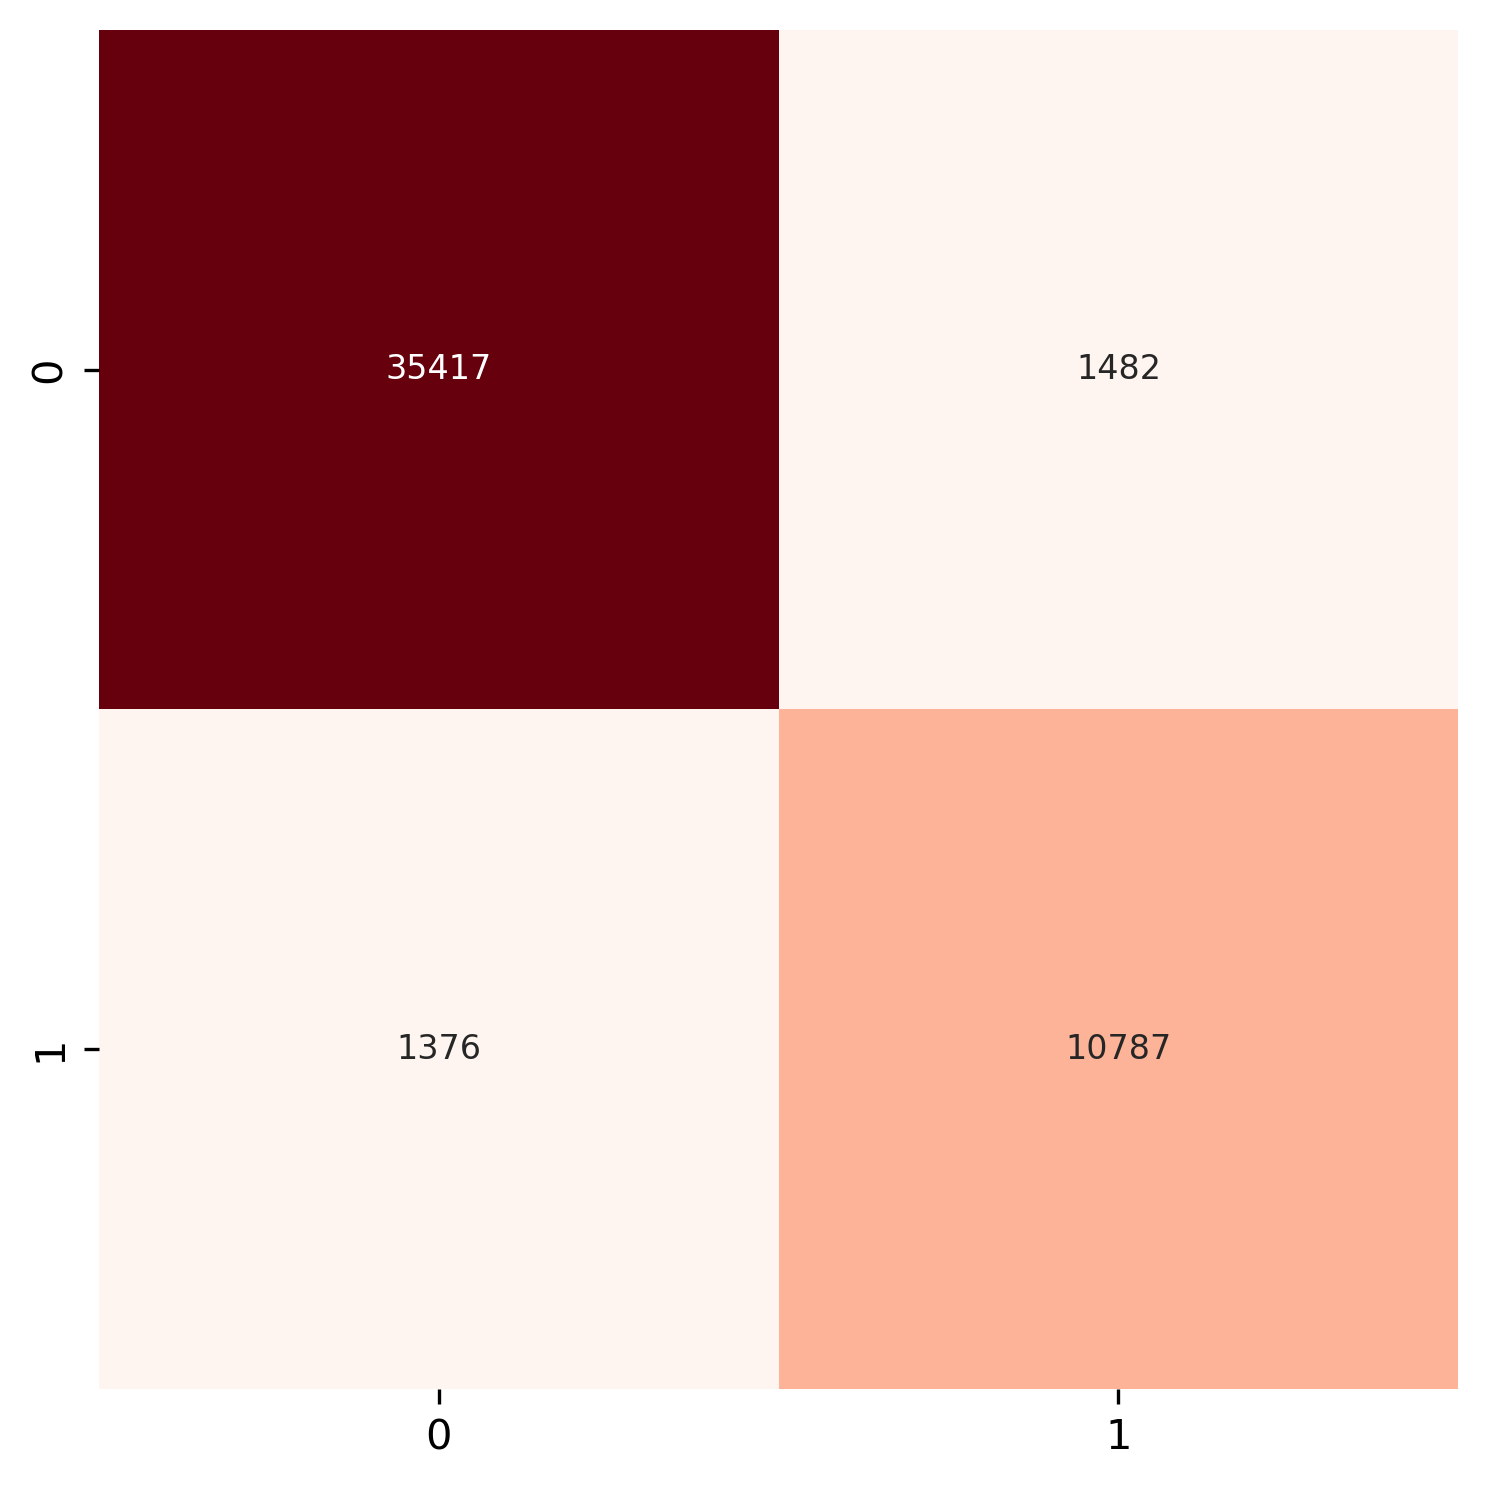

In [125]:
plt.figure(figsize=(6, 6), dpi=300)
sns.heatmap(DecisionTreeClassifier_Conf, annot=True, cmap='Reds', annot_kws={"size": 8}, square=True, cbar=False, fmt='g')

#### Karar ağacının confusion matrisine bakıldığında 3 modelden en iyi sınıflandırma başarısına sahip olduğu gözükmektedir. En fazla TP ve FP, en az TN ve FN değerleri karar ağacı modelinde görülmektedir.

### KNN Modeli için Confusion Matrisinin görselleştirilmesi

<AxesSubplot:>

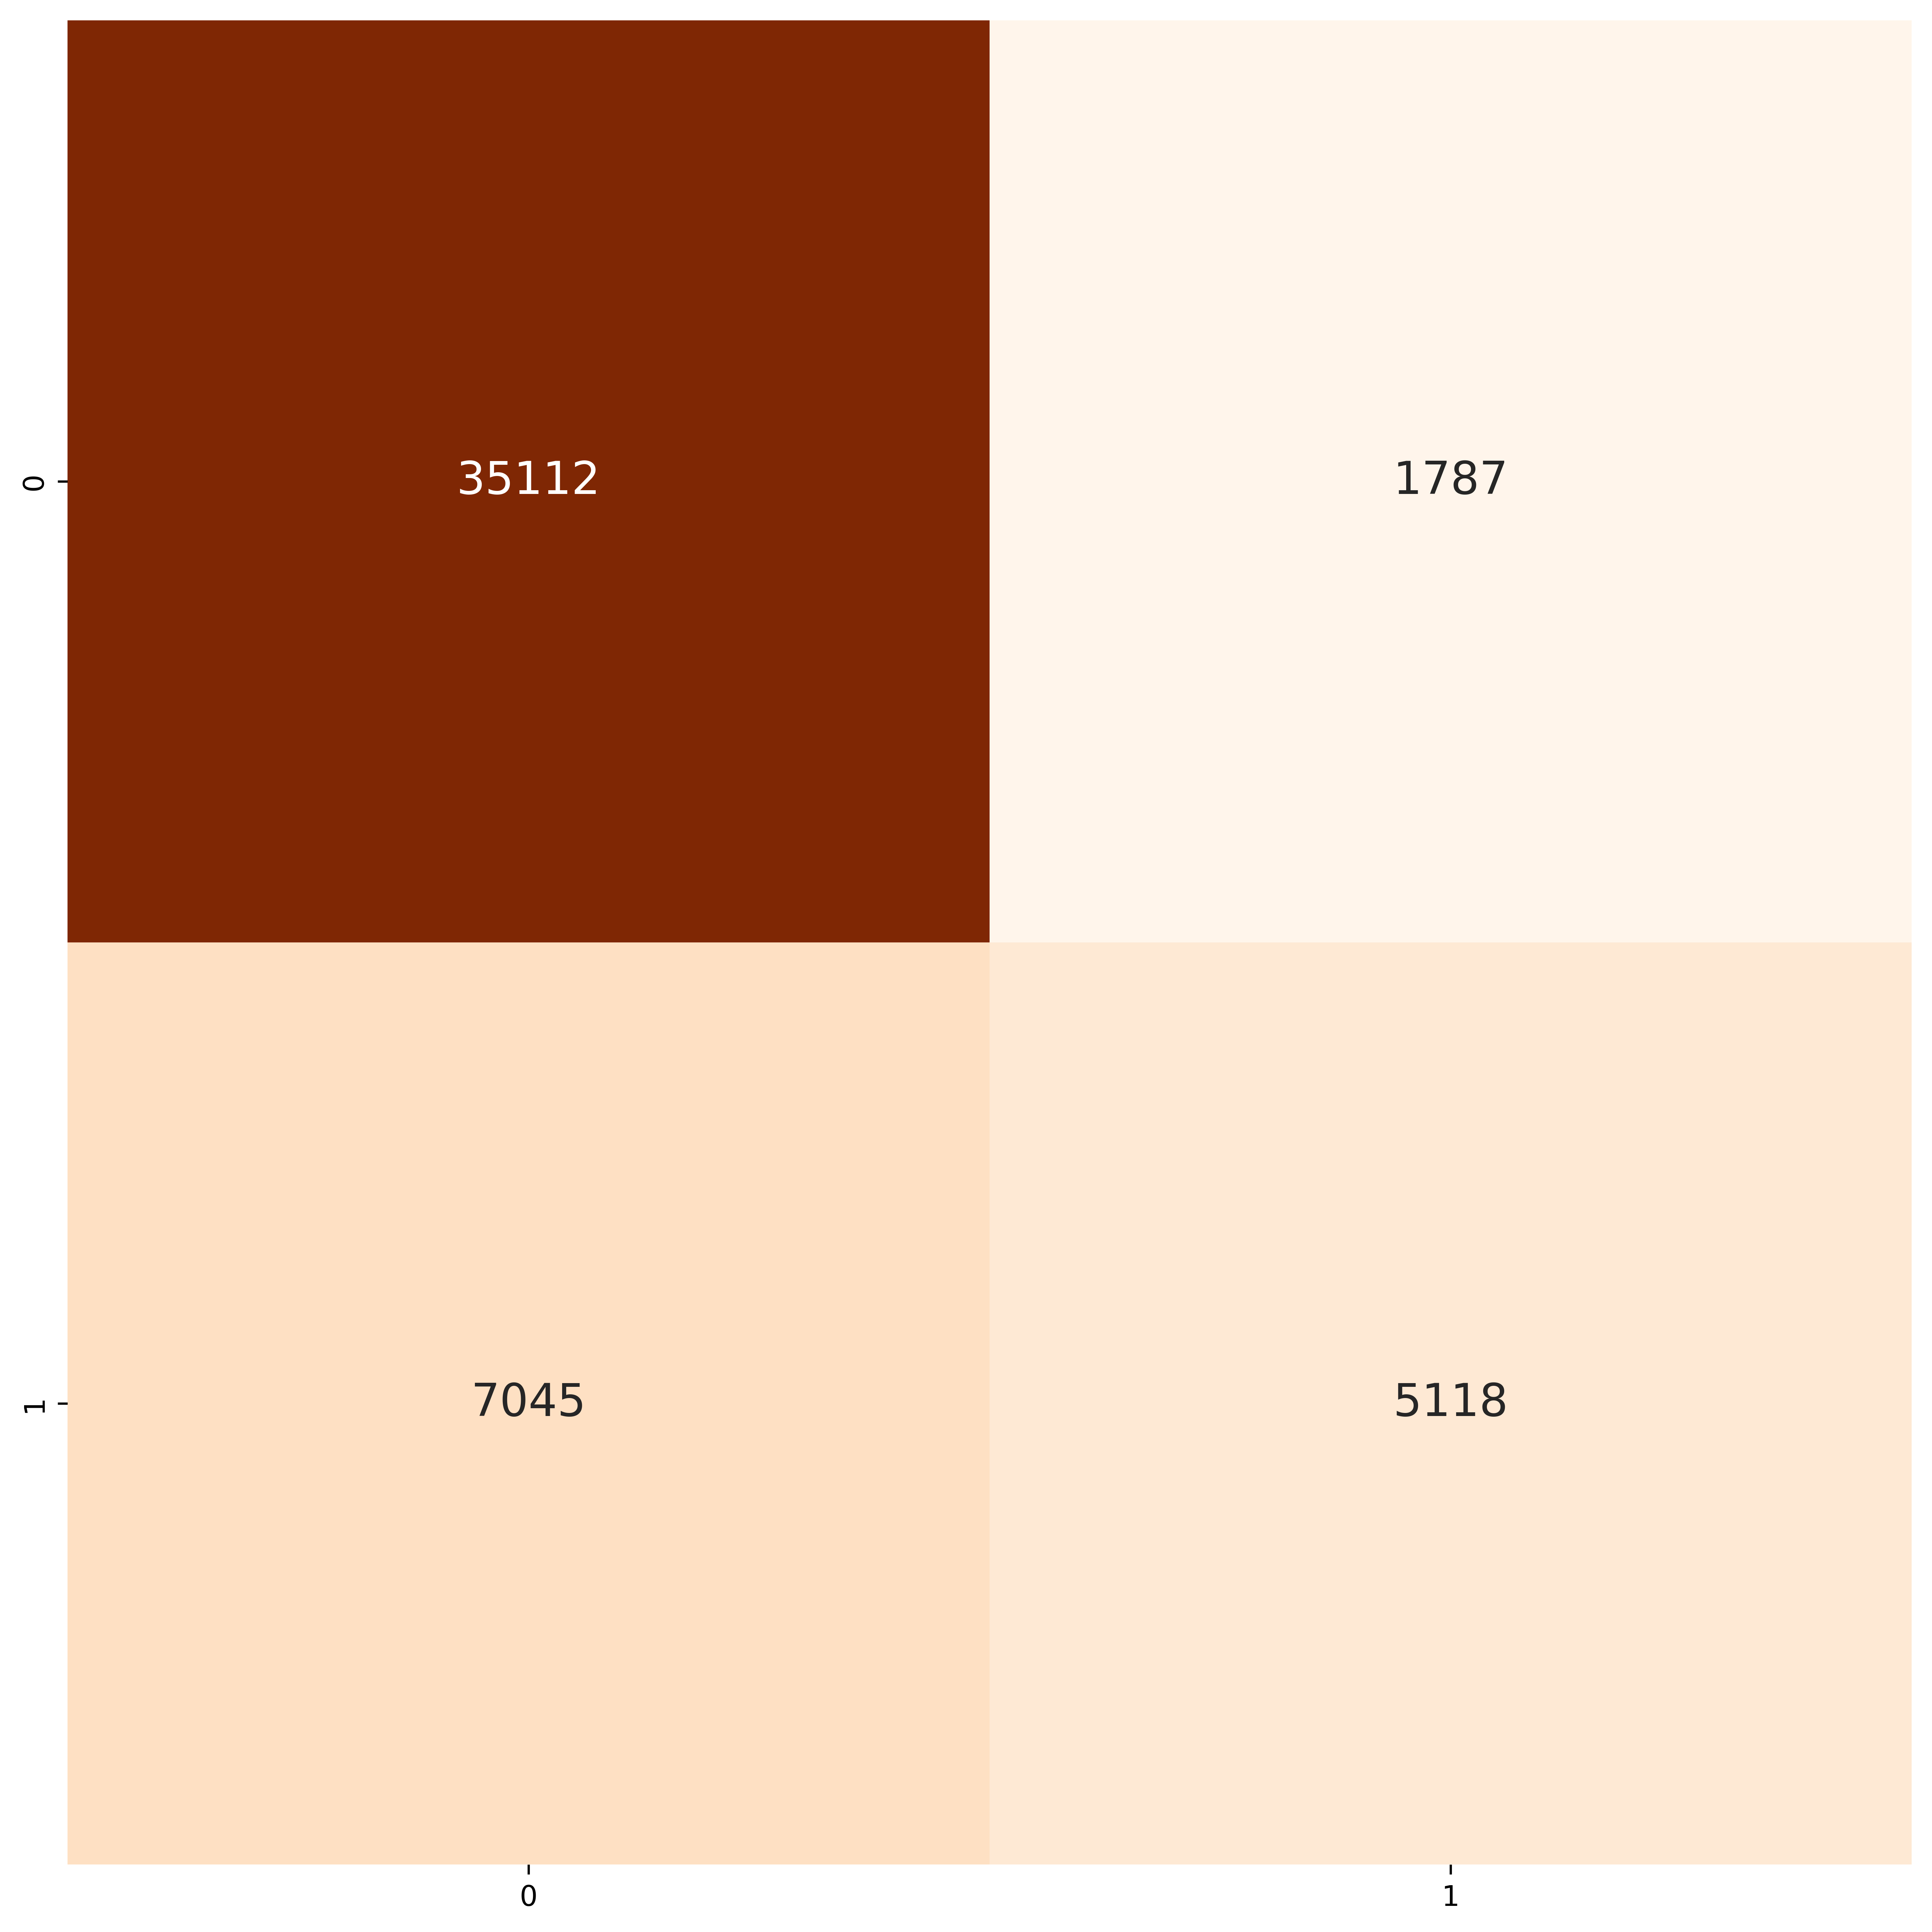

In [126]:
plt.figure(figsize=(12, 12), dpi=600)
sns.heatmap(KnnModel_Conf, annot=True, cmap='Oranges', annot_kws={"size": 16}, square=True, cbar=False, fmt='g')

#### KNN sınıflandırma modelinin; Karar ağacı modelinden kötü, Naive bayes sınıflandırma modelinden daha iyi olduğu söylenebilmektedir

### Naive Bayes Modeli için Confusion Matrisinin görselleştirilmesi

<AxesSubplot:>

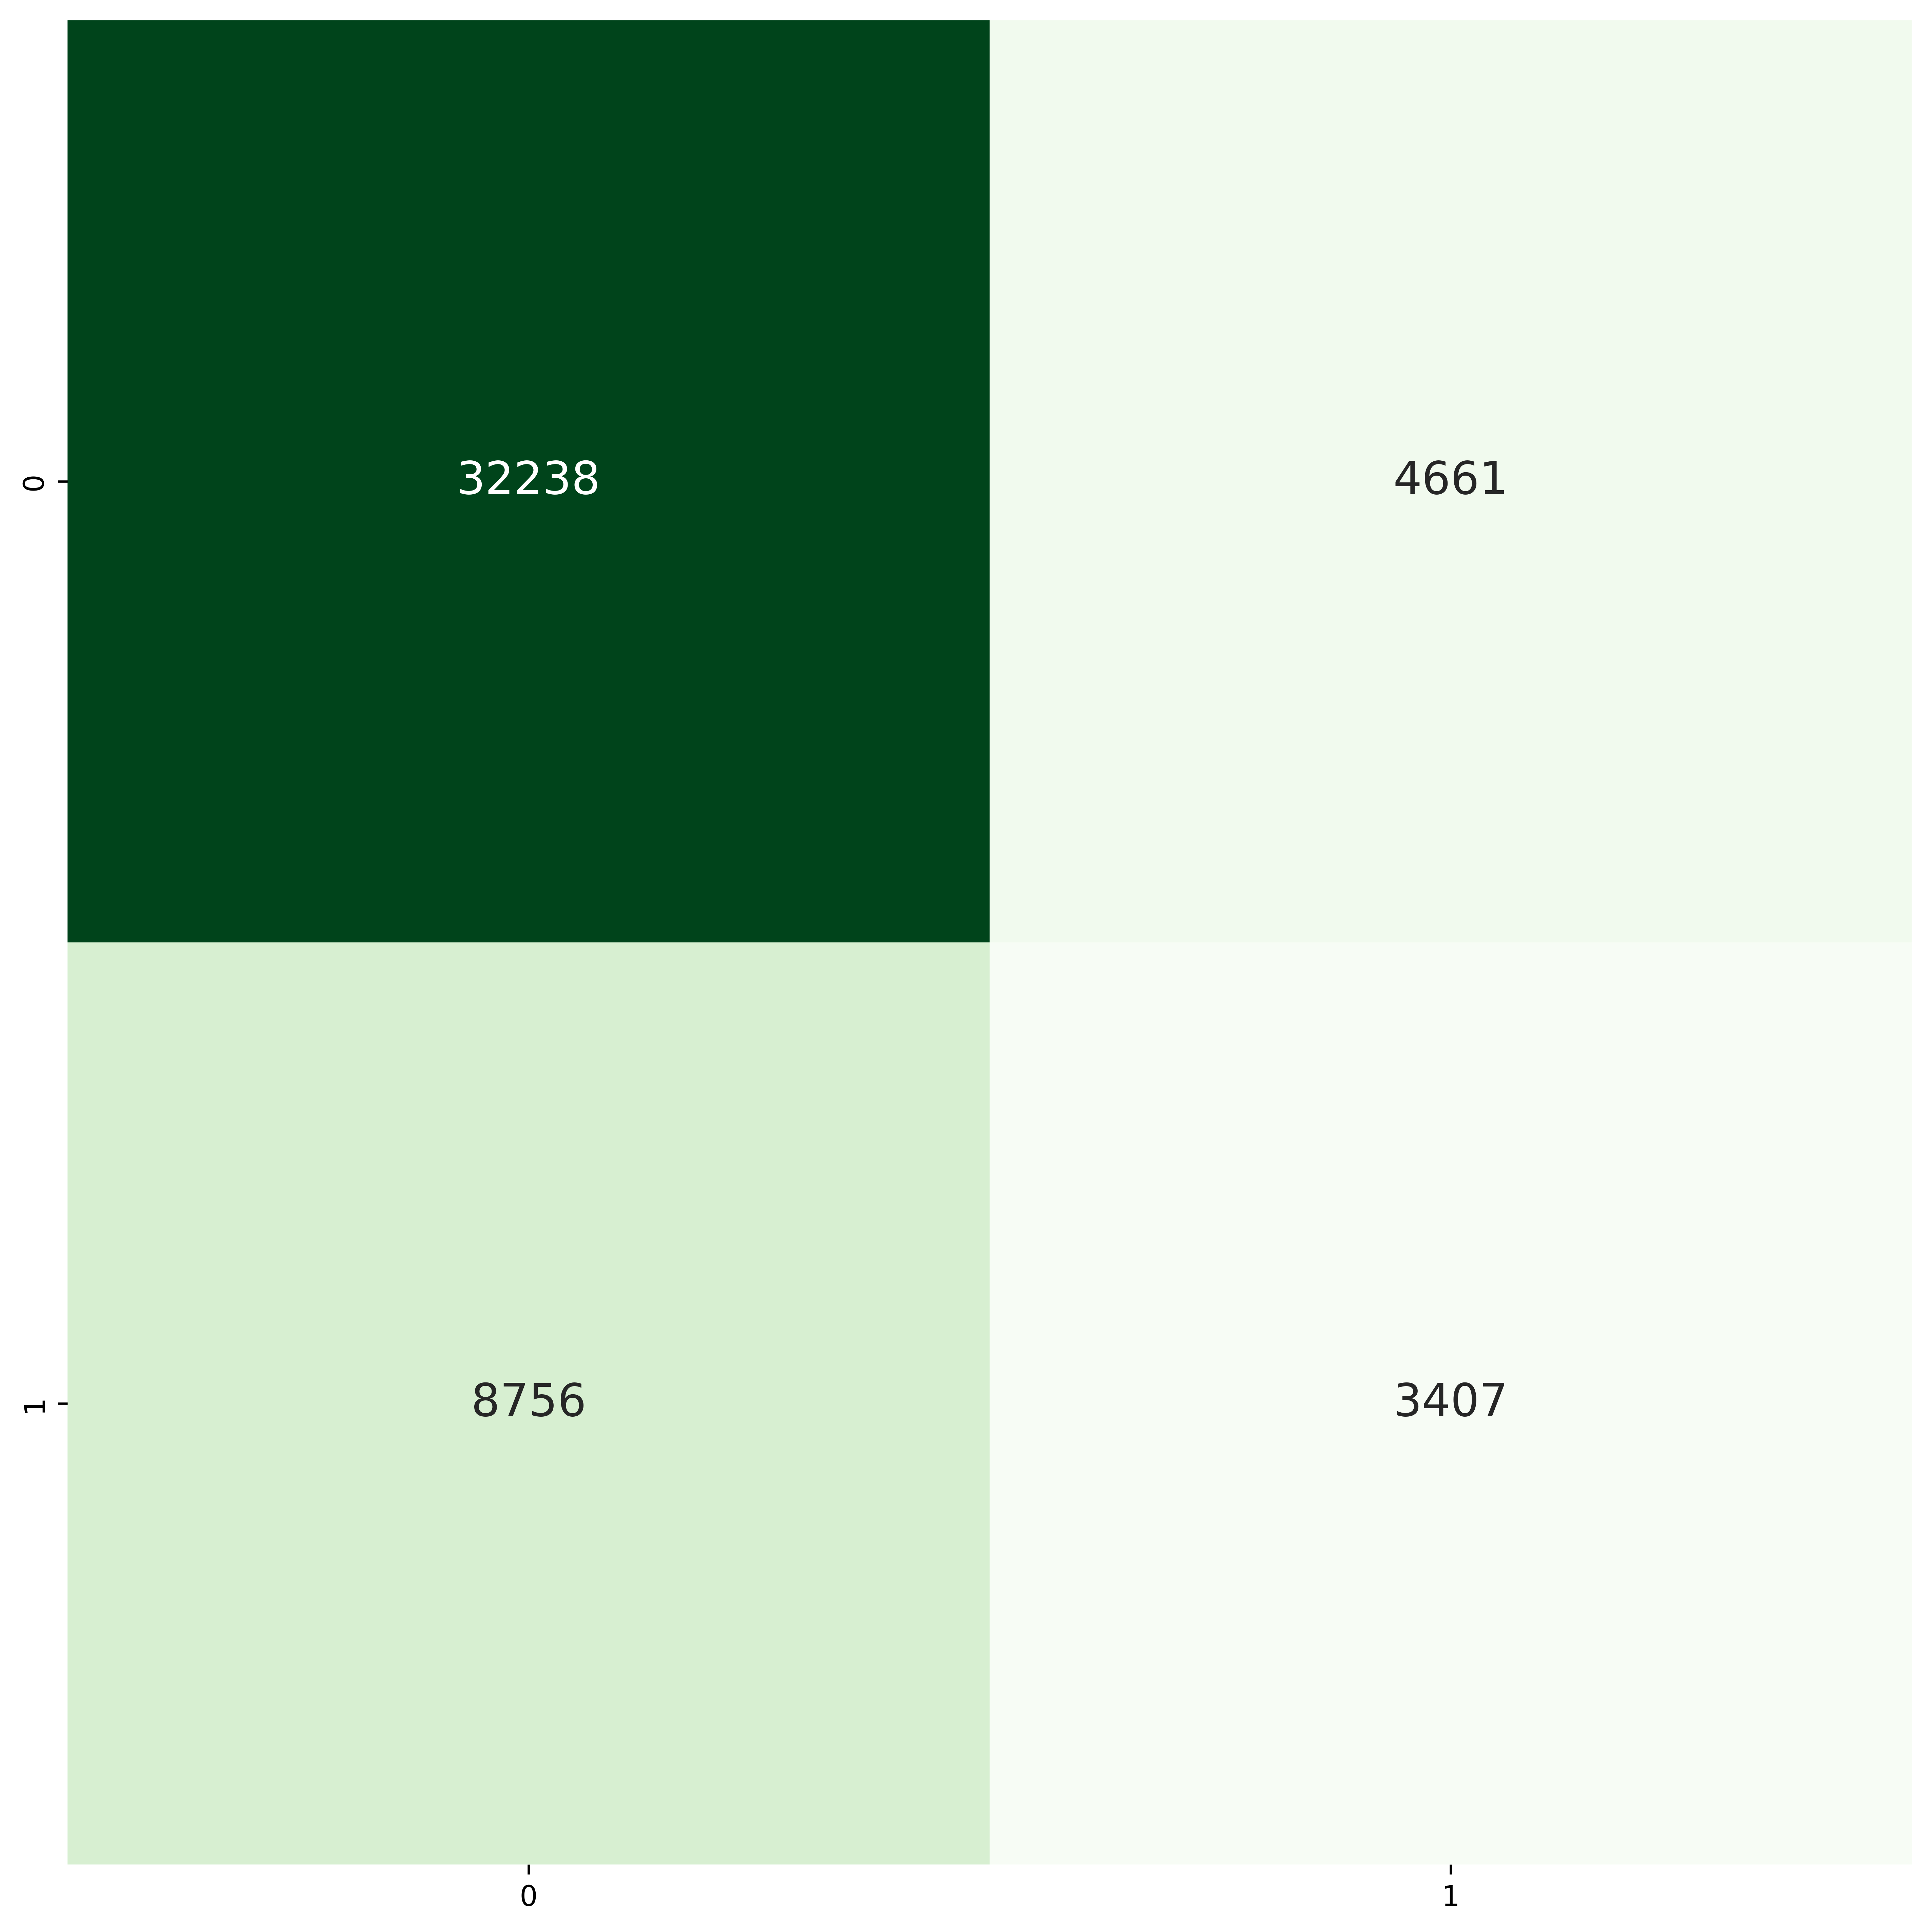

In [127]:
plt.figure(figsize=(12, 12), dpi=600)
sns.heatmap(NaiveBayesModel_Conf, annot=True, cmap='Greens', annot_kws={"size": 16}, square=True, cbar=False, fmt='g')

#### 3 Sınıflandırma modeli arasından. Naive bayes sınıflandırma algoritması başarı açısından en kötüsü olarak seçilmektedir.

In [128]:
accuracy_scores = [
    accuracy_score(y_test, DecisionTreeClassifier_Pred),
    accuracy_score(y_test, KnnModel_Pred),
    accuracy_score(y_test, NaiveBayesModel_Pred),
]
precision_scores = [
    precision_score(y_test, DecisionTreeClassifier_Pred),
    precision_score(y_test, KnnModel_Pred),
    precision_score(y_test, NaiveBayesModel_Pred),
]
recall_scores = [
    recall_score(y_test, DecisionTreeClassifier_Pred),
    recall_score(y_test, KnnModel_Pred),
    recall_score(y_test, NaiveBayesModel_Pred),
]
f1_scores = [
    f1_score(y_test, DecisionTreeClassifier_Pred),
    f1_score(y_test, KnnModel_Pred),
    f1_score(y_test, NaiveBayesModel_Pred),
]
Scores_df = pd.DataFrame(accuracy_scores, columns=['accuracy'], index=['DecisionTree', 'KNN', 'NaiveBayes'])
Scores_df['precision'] = precision_scores
Scores_df['recall'] = recall_scores
Scores_df['f1'] = f1_scores

In [129]:
Scores_df

,accuracy,precision,recall,f1
DecisionTree,0.941747,0.879208,0.886870,0.883022
KNN,0.819983,0.741202,0.420784,0.536816
NaiveBayes,0.726530,0.422286,0.280112,0.336810


#### Tablodan da anlaşılacağı üzere, en yüksek başarıya Karar ağacı modeli sahiptir. Karar ağacının hemen ardından orta seviyede yer alan KNN sınıflandırma modeli gelmektedir. En kötü olanları ise Naive bayes sınıflandırma algoritmasıdır.

## 3 modelin accuracy score değerlerinin görselleştirilmesi

<AxesSubplot:ylabel='accuracy'>

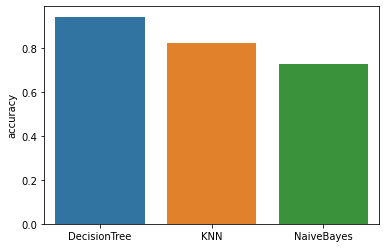

In [130]:
sns.barplot(x=Scores_df.index, y='accuracy', data=Scores_df)

## 3 modelin precision score değerlerinin görselleştirilmesi

<AxesSubplot:ylabel='precision'>

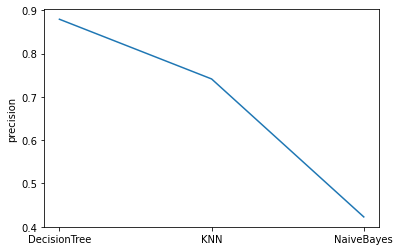

In [131]:
sns.lineplot(x=Scores_df.index, y='precision', data=Scores_df)

## 3 modelin recall score değerlerinin görselleştirilmesi

<AxesSubplot:ylabel='recall'>

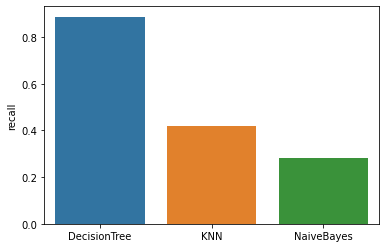

In [132]:
sns.barplot(x=Scores_df.index, y='recall', data=Scores_df)

## 3 modelin f1 score değerlerinin görselleştirilmesi

<AxesSubplot:ylabel='f1'>

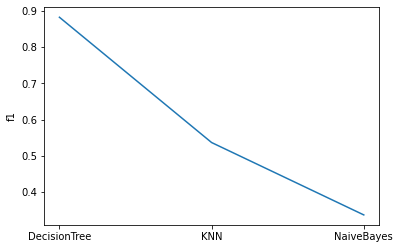

In [133]:
sns.lineplot(x=Scores_df.index, y='f1', data=Scores_df)